## Importing packages

In [20]:


# Import necessary libraries for data analysis, machine learning, and visualization
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import utils
from utils import *  # Import functions from 'utils' module
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Set a random seed for reproducibility in sklearn functions
RANDOM_STATE = 42


In [41]:
import sys
import subprocess
from pkg_resources import working_set

# Get the packages used in the notebook
imported_packages = []
for package in working_set:
    if package.project_name in sys.modules:
        imported_packages.append(package.project_name)

# Get the installed versions of the packages
versions = {package.project_name: package.version for package in working_set}

# Create a requirements.txt file
with open('requirements.txt', 'w') as f:
    for package in imported_packages:
        f.write(f"{package}=={versions[package]}\n")

# Print the generated requirements.txt file
with open('requirements.txt', 'r') as f:
    print(f.read())


asttokens==2.2.1
backcall==0.2.0
colorama==0.4.6
comm==0.1.2
debugpy==1.6.6
decorator==5.1.1
executing==1.2.0
ipykernel==6.21.1
jedi==0.18.2
parso==0.8.3
pickleshare==0.7.5
psutil==5.9.4
six==1.16.0
tornado==6.2
traitlets==5.9.0
wcwidth==0.2.6
cloudpickle==2.2.1
cycler==0.11.0
ipywidgets==8.0.4
joblib==1.2.0
kiwisolver==1.4.4
matplotlib==3.6.3
numpy==1.23.5
packaging==23.1
pandas==1.5.3
patsy==0.5.3
platformdirs==3.10.0
pyarrow==13.0.0
pyparsing==3.0.9
pytz==2022.7.1
scipy==1.10.0
seaborn==0.12.2
setuptools==67.7.2
sklearn==0.0.post1
statsmodels==0.14.0
threadpoolctl==3.1.0
xgboost==1.7.4



## 1.Loading the data

In [4]:
# First let's create a copy of our data
data=pd.read_csv('regularite-mensuelle-tgv-aqst.csv',delimiter=';')
df=data.copy()
df[['année', 'mois']] = df['date'].str.split('-', expand=True).astype(int)
df.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,année,mois
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,2018,1
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,2018,1
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,2018,1
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,2018,1
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,2018,1


In [5]:
df.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'commentaires_retard_arrivee',
       'nb_train_retard_sup_15', 'retard_moyen_trains_retard_sup15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic',
       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
       'prct_cause_prise_en_charge_voyageurs', 'année', 'mois'],
      dtype='object')

## 2. Cleaning the data

In [6]:
# Clean the dataset 'df' by removing columns with minimal relevance to the analysis

# The following columns are removed:
# - 'année'
# - 'commentaire_retards_depart'
# - 'commentaire_annulation'
# - 'commentaires_retard_arrivee'
# - 'prct_cause_externe'
# - 'prct_cause_infra'
# - 'prct_cause_gestion_trafic'
# - 'prct_cause_materiel_roulant'
# - 'prct_cause_gestion_gare'
# - 'prct_cause_prise_en_charge_voyageurs'

df_2 = clean_data(df, ['année', 'commentaire_retards_depart', 'commentaire_annulation',
                       'commentaires_retard_arrivee', 'prct_cause_externe',
                       'prct_cause_infra', 'prct_cause_gestion_trafic',
                       'prct_cause_materiel_roulant', 'prct_cause_gestion_gare',
                       'prct_cause_prise_en_charge_voyageurs'])


In [16]:
df_2.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,mois
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,110,6.511118,44,8,1
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,34,21.524020,5.696096,22,5.696096,5,0,1
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,37,9.501351,1.003981,26,55.692308,7.578947,26,7.548387,17,7,1
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,12,19.912500,1.966667,13,48.623077,6.790686,8,6.724757,6,4,1
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,61,7.796995,0.886889,71,12.405164,3.346487,17,3.346487,6,0,1


## 3.One-hot encoding

In [7]:

# List of categorical columns to be one-hot encoded
categorical_columns = ['service', 'gare_depart', 'gare_arrivee']

# Use pandas' get_dummies function to perform one-hot encoding on the specified columns
data_2 = pd.get_dummies(df_2, columns=categorical_columns)

# Display the shape of the encoded dataset to show the impact of one-hot encoding
print(f"Shape of the encoded dataset : {data_2.shape}")


Shape of the encoded dataset : (8154, 135)


## 4.Boxplot of numerical features

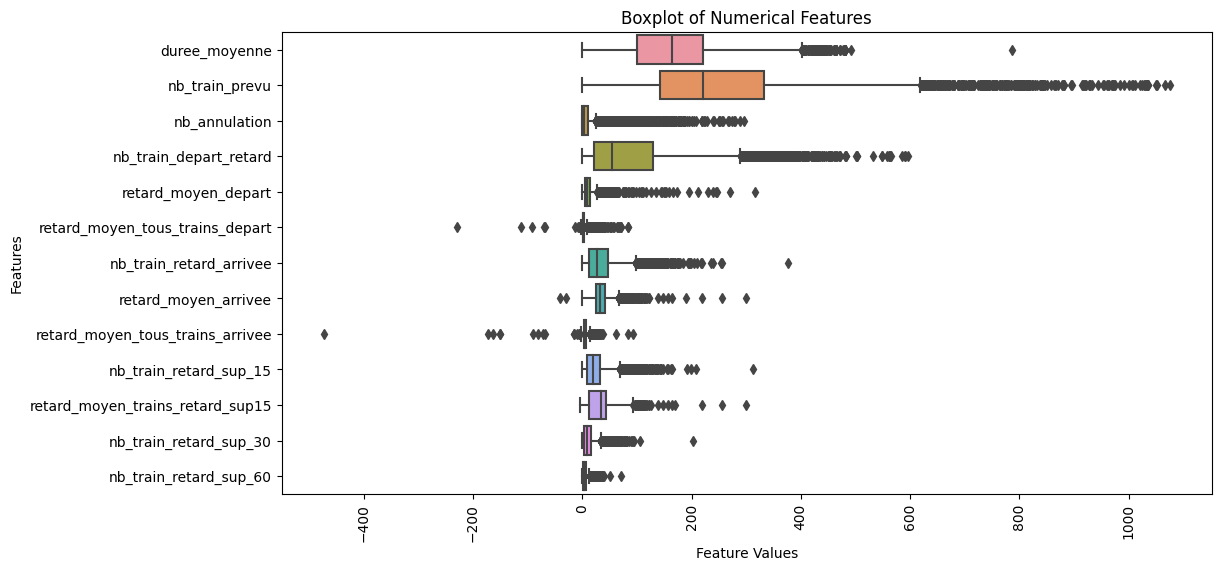

In [8]:
# Select Numerical Features for Boxplot

# Select columns containing numerical features (integers and floats) from the cleaned dataset
numeric_features = df_2.select_dtypes(include=['float64', 'int64'])

# Create a boxplot to visualize the scale and distribution of each numerical feature
plt.figure(figsize=(12, 6))

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Set the title of the boxplot
plt.title('Boxplot of Numerical Features')

# Create a boxplot using Seaborn to display the distribution of numerical features
sns.boxplot(data=numeric_features, orient="h")

# Label the x and y axes
plt.xlabel('Feature Values')
plt.ylabel('Features')

# Display the boxplot
plt.show()


In [9]:
# Generate summary statistics (mean, standard deviation, etc.) for the selected numerical features
numeric_features.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,nb_train_retard_arrivee,retard_moyen_arrivee,retard_moyen_tous_trains_arrivee,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60
count,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,88.434265,11.205745,3.076737,34.516066,33.950971,5.668612,24.434511,32.193823,11.642016,4.245892
std,87.390774,173.815703,26.544553,90.384803,12.476780,5.432676,29.729349,15.702663,7.971691,21.400761,20.195926,11.225104,4.901032
min,0.000000,0.000000,0.000000,0.000000,0.000000,-229.269444,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,22.000000,5.128410,1.140258,13.000000,24.636941,3.129384,9.000000,12.140350,4.000000,1.000000
50%,164.000000,221.000000,3.000000,55.000000,9.036447,2.248271,27.000000,32.441236,4.962422,19.000000,34.932765,9.000000,3.000000
75%,221.000000,333.000000,10.000000,129.000000,14.219375,3.903651,47.000000,41.346717,7.673542,33.000000,44.268749,16.000000,6.000000
max,786.000000,1075.000000,297.000000,596.000000,316.188095,84.516667,376.000000,299.600000,92.000000,312.000000,299.600000,202.000000,71.000000


## 5.Splitting the data

In [10]:
# Select the test data from the encoded dataset
test_data2 = select_test_data(data_2)

# Select the training data from the encoded dataset
train_data2 = select_train_data(data_2, test_data2)

# Display the shape of the training dataset
print(f"Shape of the training dataset : {train_data2.shape}")

# Display the shape of the test dataset
print(f"Shape of the test dataset : {test_data2.shape}")

Shape of the training dataset : (7428, 135)
Shape of the test dataset : (726, 135)


In [11]:
# We drop the date column to keep only the features we will use
train_data2=train_data2.drop(columns=['date'],axis=1)
test_data2=test_data2.drop(columns=['date'],axis=1)
train_data2.columns


Index(['duree_moyenne', 'nb_train_prevu', 'nb_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'nb_train_retard_arrivee',
       'retard_moyen_arrivee', 'retard_moyen_tous_trains_arrivee',
       'nb_train_retard_sup_15',
       ...
       'gare_arrivee_ST PIERRE DES CORPS', 'gare_arrivee_STRASBOURG',
       'gare_arrivee_STUTTGART', 'gare_arrivee_TOULON',
       'gare_arrivee_TOULOUSE MATABIAU', 'gare_arrivee_TOURCOING',
       'gare_arrivee_TOURS', 'gare_arrivee_VALENCE ALIXAN TGV',
       'gare_arrivee_VANNES', 'gare_arrivee_ZURICH'],
      dtype='object', length=134)

In [12]:
# Extracting Target Variables

# Define the target column(s) to be extracted
target_columns = ['retard_moyen_arrivee']

# Extract the target variable for the training dataset
y_train2 = target_fun(train_data2, target_columns)

# Extract the target variable for the test dataset
y_test2 = target_fun(test_data2, target_columns)

# Display the shape of the y_train array
print(f"Shape of y_train : {y_train2.shape}")

# Display the shape of the y_test array
print(f"Shape of y_test : {y_test2.shape}")


Shape of y_train : (7428,)
Shape of y_test : (726,)


In [13]:
# Extracting Features

# Define the target column(s) for feature extraction
target_columns = ['retard_moyen_arrivee']

# Extract the features for the training dataset
X_train2 = features(train_data2, target_columns)

# Extract the features for the test dataset
X_test2 = features(test_data2, target_columns)

# Display the shape of the X_train dataset
print(f"Shape of X_train : {X_train2.shape}")

# Display the shape of the X_test dataset
print(f"Shape of X_test : {X_test2.shape}")


Shape of X_train : (7428, 133)
Shape of X_test : (726, 133)


# 6. Decision trees

In [14]:
# Create a pipeline for training a Decision Tree model
pipeline_tr = Pipeline([
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))  # Use DecisionTreeRegressor
])

# Fit the Decision Tree model to the training data
pipeline_tr.fit(X_train2, y_train2)

Pipeline(steps=[('tree', DecisionTreeRegressor(random_state=42))])

In [22]:
# Predict using the Decision Tree model
pred = pipeline_tr.predict(X_test2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test2, pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test2, pred, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test2, pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test2, pred)

# Print the evaluation metrics for the Decision Tree model 
print('Metrics for using Decision Trees :\n')
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Metrics for using Decision Trees :

Mean Squared Error (MSE): 43.932422754776674
Root Mean Squared Error (RMSE): 6.6281537968560045
Mean Absolute Error (MAE): 3.127211009197429
R-squared (R2): 0.8769049673364546


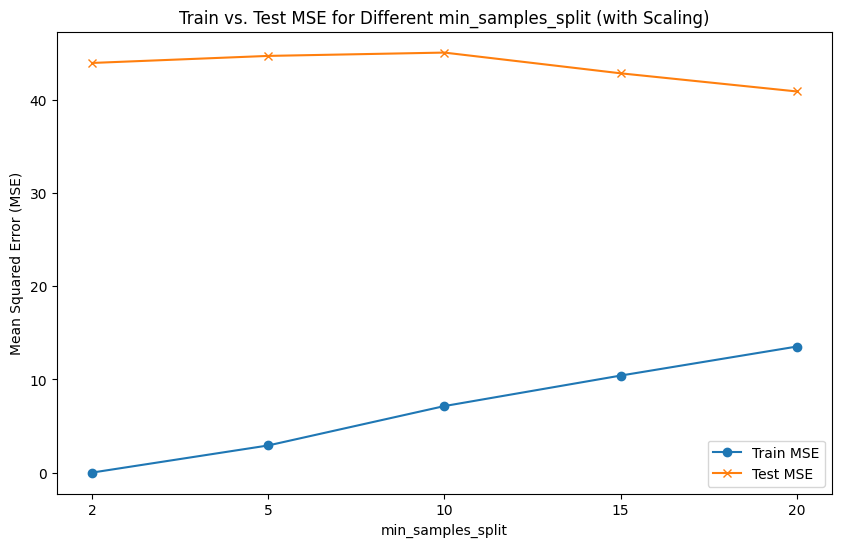

In [23]:
# Hyperparameter Tuning: min_samples_split for Decision Tree

# Define a list of values for the min_samples_split hyperparameter
min_samples_split_list = [2, 5, 10, 15, 20]

# Lists to store the MSE values for training and testing data
mse_train_list = []
mse_test_list = []

# Loop through different values of min_samples_split and evaluate the model
for min_samples_split in min_samples_split_list:
    # Create a pipeline with scaling and DecisionTreeRegressor with min_samples_split
    pipeline_t = Pipeline([
        ('tree', DecisionTreeRegressor(min_samples_split=min_samples_split, random_state=RANDOM_STATE))
    ])
    
    # Fit the pipeline to the training data
    pipeline_t.fit(X_train2, y_train2)

    # Make predictions on the training and testing data
    predictions_train = pipeline_t.predict(X_train2)
    predictions_test = pipeline_t.predict(X_test2)

    # Calculate MSE for training and testing data
    mse_train = mean_squared_error(y_train2, predictions_train)
    mse_test = mean_squared_error(y_test2, predictions_test)

    # Append MSE values to the respective lists
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Create a plot to visualize the performance with different min_samples_split values
plt.figure(figsize=(10, 6))
plt.title('Train vs. Test MSE for Different min_samples_split (with Scaling)')
plt.xlabel('min_samples_split')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(mse_train_list, label='Train MSE', marker='o')
plt.plot(mse_test_list, label='Test MSE', marker='x')
plt.legend()
plt.show()


 a min_samples_split value of 20 appears to be the best choice for our Decision Tree model as it results in the lowest testing MSE, indicating better generalization to unseen data. The extremely low training MSE for min_samples_split of 2 may suggest overfitting, so it's important to strike a balance between model complexity and generalization when selecting hyperparameter values.

## Final Decision tree model

In [24]:
# Create a pipeline for training a Decision Tree model
pipeline_tree = Pipeline([
    ('tree', DecisionTreeRegressor(min_samples_split=20,random_state=RANDOM_STATE))  # Use DecisionTreeRegressor
])

# Fit the Decision Tree model to the training data
pipeline_tree.fit(X_train2, y_train2)
# Predict using the Decision Tree model
pred_tree = pipeline_tree.predict(X_test2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test2, pred_tree)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test2, pred_tree, squared=False)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test2, pred_tree)

# Calculate R-squared (R2)
r2 = r2_score(y_test2, pred_tree)

# Print the evaluation metrics for the Decision Tree model 
print('Metrics for using Decision Trees :\n')
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Metrics for using Decision Trees :

Mean Squared Error (MSE): 40.877319177847916
Root Mean Squared Error (RMSE): 6.393537297759974
Mean Absolute Error (MAE): 2.9345800775879143
R-squared (R2): 0.8854651161061163


# 7. Random forest

In [27]:
# Define the pipeline for the Random Forest model
pipeline_rand_forest = Pipeline([
    ('rf', RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE))  # Use RandomForestRegressor
])

# Fit the Random Forest model to the training data
pipeline_rand_forest.fit(X_train2, y_train2)

# Make predictions on your test data
y_pred = pipeline_rand_forest.predict(X_test2)

# Calculate regression metrics
mse_rand_forest = mean_squared_error(y_test2, y_pred)  # Calculate Mean Squared Error (MSE)
rmse_rand_forest = mean_squared_error(y_test2, y_pred, squared=False)  # Calculate Root Mean Squared Error (RMSE)
r2_rand_forest = r2_score(y_test2, y_pred)  # Calculate R-squared (R2)

mae_rand_forest = mean_absolute_error(y_test2, y_pred)  # Calculate Mean Absolute Error (MAE)

# Print the metrics including MAE
print('Metrics for using Random Forest\n')
print(f"Mean Squared Error (MSE): {mse_rand_forest}")
print(f"Root Mean Squared Error (RMSE): {rmse_rand_forest}")
print(f"Mean Absolute Error (MAE): {mae_rand_forest}")
print(f"R-squared (R2): {r2_rand_forest}")


Metrics for using Random Forest

Mean Squared Error (MSE): 39.078021701082605
Root Mean Squared Error (RMSE): 6.6281537968560045
Mean Absolute Error (MAE): 2.220272765449593
R-squared (R2): 0.8905065995433069


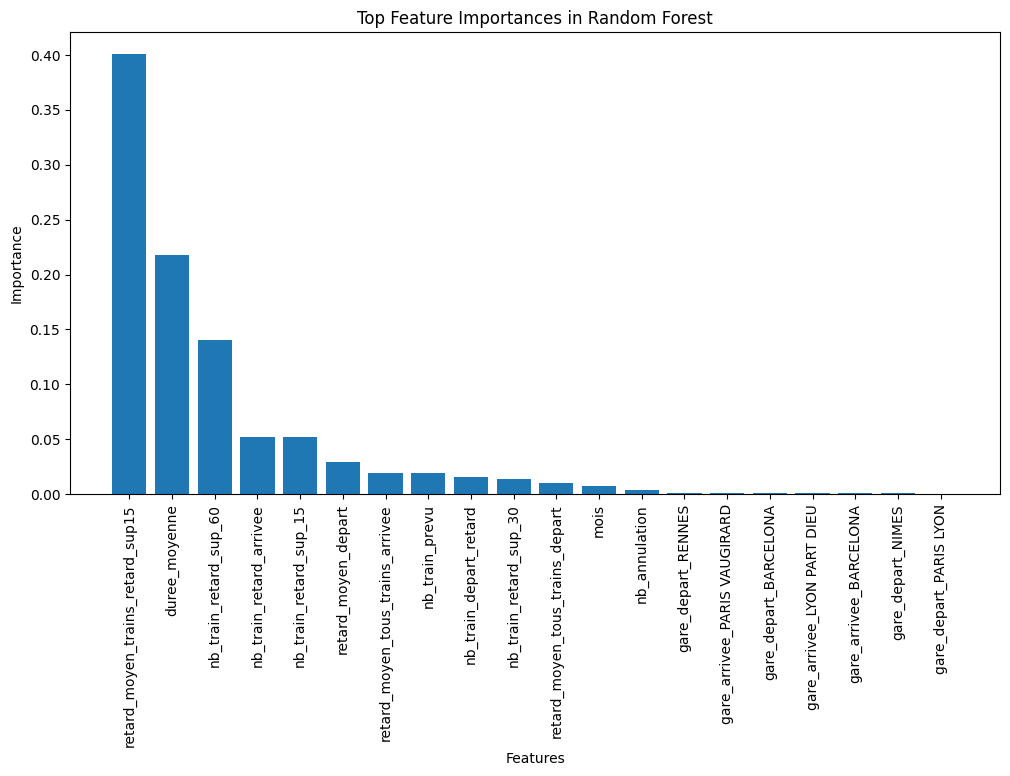

In [28]:
# Extract the trained Random Forest model from the pipeline
rf_model = pipeline_rand_forest.named_steps['rf']

# Get feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(X_train2.columns, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Number of top features to display
top_n = 20  

# Extract the top features and their importances
top_features = [feature[0] for feature in sorted_features[:top_n]]
top_importances = [feature[1] for feature in sorted_features[:top_n]]

# Create a bar plot to visualize the top feature importances
plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.title('Top Feature Importances in Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 8. Bagging regressor

In [30]:
# Define the base regression model (DecisionTreeRegressor)
base_regressor = DecisionTreeRegressor(random_state=RANDOM_STATE)

# Create a BaggingRegressor with the base model
bagging_model = BaggingRegressor(base_regressor, n_estimators=100, random_state=RANDOM_STATE)

# Create a pipeline with the BaggingRegressor
pipeline = Pipeline([
    ('bagging', bagging_model)
])

# Fit the BaggingRegressor model to the training data
pipeline.fit(X_train2, y_train2)

# Make predictions on your test data using the BaggingRegressor
y_pred = pipeline.predict(X_test2)

# Calculate regression metrics for the BaggingRegressor model
mse_bagging = mean_squared_error(y_test2, y_pred)  # Calculate Mean Squared Error (MSE)
rmse_bagging = np.sqrt(mse_bagging)  # Calculate Root Mean Squared Error (RMSE)
mae_bagging = mean_absolute_error(y_test2, y_pred)  # Calculate Mean Absolute Error (MAE)
r2_bagging = r2_score(y_test2, y_pred)  # Calculate R-squared (R2) Score

# Print the metrics for the BaggingRegressor model
print("Mean Squared Error (MSE):", mse_bagging)
print("Root Mean Squared Error (RMSE):", rmse_bagging)
print("Mean Absolute Error (MAE):", mae_bagging)
print("R-squared (R2) Score:", r2_bagging)


Mean Squared Error (MSE): 40.591534397622354
Root Mean Squared Error (RMSE): 6.371148593277538
Mean Absolute Error (MAE): 2.2344114555503287
R-squared (R2) Score: 0.8862658615385495


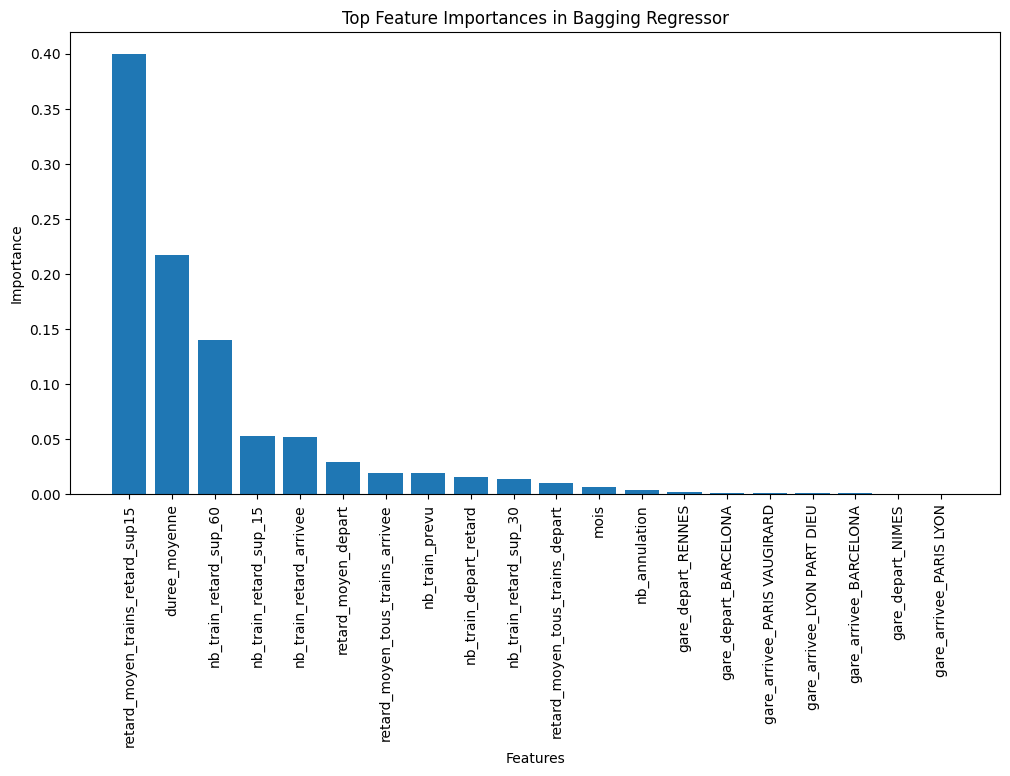

In [31]:
# Extract the base regressor from the BaggingRegressor
base_regressor = pipeline.named_steps['bagging'].base_estimator

# Get feature importances from the base regressor (if available)
if hasattr(base_regressor, 'feature_importances_'):
    feature_importances = base_regressor.feature_importances_
else:
    # If the base regressor doesn't have feature importances, you can calculate them manually
    # For example, if the base regressor is DecisionTreeRegressor
    feature_importances = np.mean([tree.feature_importances_ for tree in pipeline.named_steps['bagging'].estimators_], axis=0)

    # The above code calculates feature importances by averaging them across all bagged trees
    # Uncomment the relevant line based on your base regressor

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(X_train2.columns, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Number of top features to display
top_n = 20  

# Extract the top features and their importances
top_features = [feature[0] for feature in sorted_features[:top_n]]
top_importances = [feature[1] for feature in sorted_features[:top_n]]

# Create a bar plot to visualize the top feature importances
plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.title('Top Feature Importances in Bagging Regressor')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# 9. XGBoost

In [32]:
# Create a pipeline with XGBoost training
pipeline_xgb = Pipeline([
    ('xgb', XGBRegressor(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE))
])

# Fit the XGBoost model to the training data
pipeline_xgb.fit(X_train2, y_train2)

# Make predictions on your test data using the XGBoost model
y_pred_xgb = pipeline_xgb.predict(X_test2)

# Calculate regression metrics for the XGBoost model
mse_xgb = mean_squared_error(y_test2, y_pred_xgb)  # Calculate Mean Squared Error (MSE)
rmse_xgb = np.sqrt(mse_xgb)  # Calculate Root Mean Squared Error (RMSE)
mae_xgb = mean_absolute_error(y_test2, y_pred_xgb)  # Calculate Mean Absolute Error (MAE)
r2_xgb = r2_score(y_test2, y_pred_xgb)  # Calculate R-squared (R2) Score

# Print the metrics for the XGBoost model
print("XGBoost Mean Squared Error (MSE):", mse_xgb)
print("XGBoost Root Mean Squared Error (RMSE):", rmse_xgb)
print("XGBoost Mean Absolute Error (MAE):", mae_xgb)
print("XGBoost R-squared (R2) Score:", r2_xgb)


XGBoost Mean Squared Error (MSE): 21.315126008590155
XGBoost Root Mean Squared Error (RMSE): 4.616830732070449
XGBoost Mean Absolute Error (MAE): 1.8291158104832173
XGBoost R-squared (R2) Score: 0.940276771283466


# Comparaison

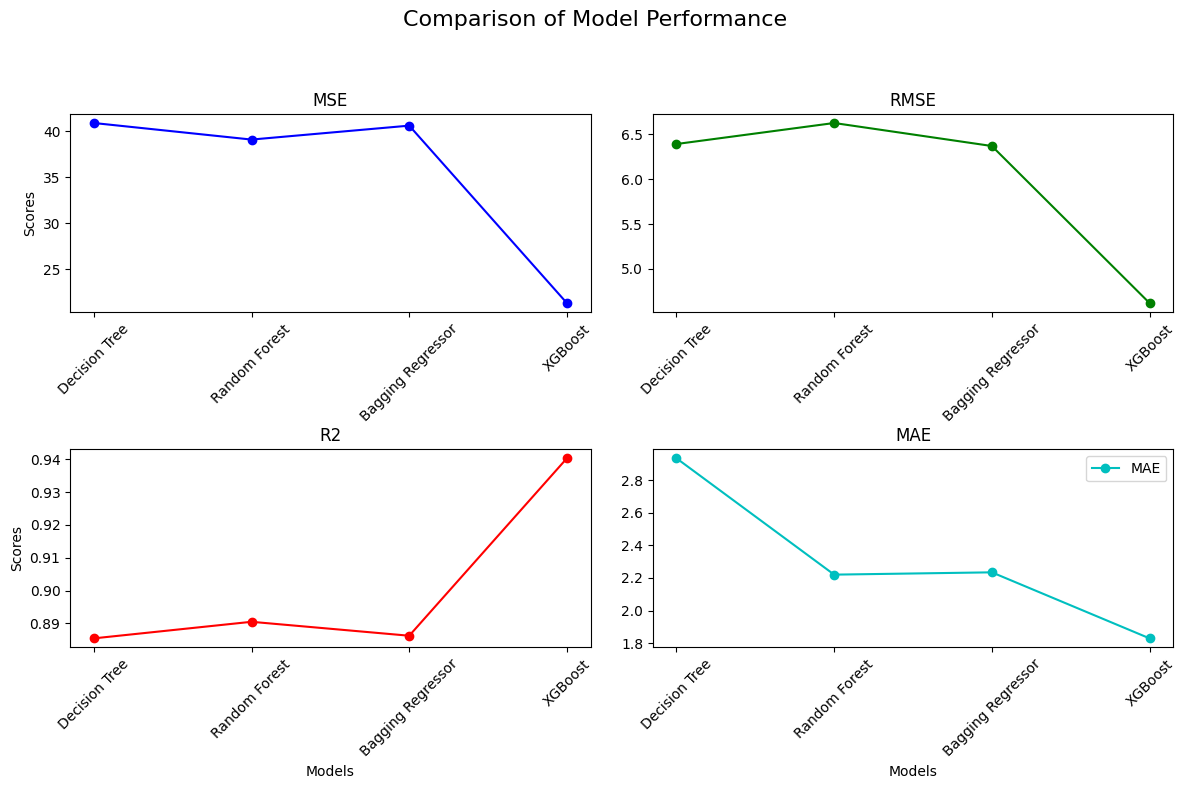

In [38]:


# Define the model names and their corresponding metrics
model_names = ["Decision Tree", "Random Forest", "Bagging Regressor", "XGBoost"]
mse_scores = [mse, mse_rand_forest, mse_bagging, mse_xgb]
rmse_scores = [rmse, rmse_rand_forest, rmse_bagging, rmse_xgb]
r2_scores = [r2, r2_rand_forest, r2_bagging, r2_xgb]
mae_scores = [mae, mae_rand_forest, mae_bagging, mae_xgb]

# Create an array for the x-axis representing the models
models = np.arange(len(model_names))

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Comparison of Model Performance", fontsize=16)

# MSE subplot
axs[0, 0].plot(models, mse_scores, marker='o', color='b', label="MSE")
axs[0, 0].set_title("MSE")
axs[0, 0].set_ylabel("Scores")
axs[0, 0].set_xticks(models)
axs[0, 0].set_xticklabels(model_names, rotation=45)

# RMSE subplot
axs[0, 1].plot(models, rmse_scores, marker='o', color='g', label="RMSE")
axs[0, 1].set_title("RMSE")
axs[0, 1].set_xticks(models)
axs[0, 1].set_xticklabels(model_names, rotation=45)

# R2 subplot
axs[1, 0].plot(models, r2_scores, marker='o', color='r', label="R2")
axs[1, 0].set_title("R2")
axs[1, 0].set_xlabel("Models")
axs[1, 0].set_ylabel("Scores")
axs[1, 0].set_xticks(models)
axs[1, 0].set_xticklabels(model_names, rotation=45)

# MAE subplot
axs[1, 1].plot(models, mae_scores, marker='o', color='c', label="MAE")
axs[1, 1].set_title("MAE")
axs[1, 1].set_xlabel("Models")
axs[1, 1].set_xticks(models)
axs[1, 1].set_xticklabels(model_names, rotation=45)

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.legend()
plt.show()


# Saving the predictions by XGBoost

In [ ]:
y_pred_train_xgb = pipeline_xgb.predict(X_train2)
np.savetxt('y_pred_train_xgb.csv', y_pred_train_xgb,delimiter=',')
np.savetxt('y_pred_xgb.csv', y_pred_xgb,delimiter=',')